<a href="https://colab.research.google.com/github/Karla-Flores/Project-04/blob/main/Chicago_Crime.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **Preprocessing**

In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
# from sklearn.linear_model import SGDClassifier
# import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Uploading ETL file
data = pd.read_csv('../Resources/chicago_crime_db.csv')
data.head(20)

,Primary Type,Arrest,Domestic,Latitude,Longitude,Location Description,HOUR,SEASON
0,BATTERY,False,True,41.815117,-87.670000,RESIDENCE,Afternoon,Autumn
1,THEFT,False,False,41.895080,-87.765400,CTA,Morning,Autumn
2,NARCOTICS,True,False,41.937406,-87.716650,PUBLIC OPEN SPACE,Afternoon,Autumn
3,ASSAULT,False,True,41.881903,-87.755121,RESIDENCE,Afternoon,Autumn
4,BURGLARY,False,False,41.744379,-87.658431,RESIDENCE,Morning,Autumn
5,BURGLARY,False,False,41.914636,-87.681631,RESIDENCE,Evening,Autumn
6,THEFT,True,False,41.851989,-87.689219,COMMERCIAL BUILDING,Afternoon,Autumn
7,ROBBERY,False,True,41.882814,-87.704326,PUBLIC OPEN SPACE,Morning,Autumn
8,THEFT,False,False,41.763648,-87.722345,PUBLIC OPEN SPACE,Afternoon,Autumn
9,BATTERY,False,False,41.975968,-87.768014,COMMERCIAL BUILDING,Morning,Autumn


In [3]:
data.shape

(6691918, 8)

In [4]:
# Convert categorical data to numeric with `pd.get_dummies`
data_dummies = pd.get_dummies(data, columns = ['Location Description', 'Primary Type', 'HOUR', 'SEASON'],dtype=float)
data_dummies.head()

,Arrest,Domestic,Latitude,Longitude,Location Description_AIRPORT,Location Description_CHURCH,Location Description_COMMERCIAL BUILDING,Location Description_CTA,Location Description_EDUCATIONAL BUILDING,Location Description_FEDERAL PROPERTY,...,Primary Type_THEFT,Primary Type_WEAPONS VIOLATION,HOUR_Afternoon,HOUR_Evening,HOUR_Morning,HOUR_Night,SEASON_Autumn,SEASON_Spring,SEASON_Summer,SEASON_Winter
0,False,True,41.815117,-87.670000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,False,False,41.895080,-87.765400,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2,True,False,41.937406,-87.716650,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,False,True,41.881903,-87.755121,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,False,False,41.744379,-87.658431,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0


In [5]:
# Split our preprocessed data into our features and target arrays
y = data_dummies.Arrest
X = data_dummies.drop('Arrest', axis=1)

In [6]:
# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state= 42)

In [7]:
# Standardizing dataset so columns that contain larger values do not unduly influence the outcome
scaler = StandardScaler().fit(X)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Random Forest Classifier

In [8]:
from sklearn.ensemble import RandomForestClassifier
# Train the Random Forest classifier model on the scaled data and print the model score
# model = RandomForestClassifier(n_estimators=100, max_depth=10, min_samples_leaf=1, random_state=1)
model = RandomForestClassifier(n_estimators=100, max_depth=6, min_samples_leaf=10000, random_state=42)
model.fit(X_train_scaled, y_train)

print(f'Training Score: {round(model.score(X_train_scaled, y_train)*100,4)}%')
print(f'Testing Score: {round(model.score(X_test_scaled, y_test)*100,4)}%')

Training Score: 84.1202%
Testing Score: 84.1346%


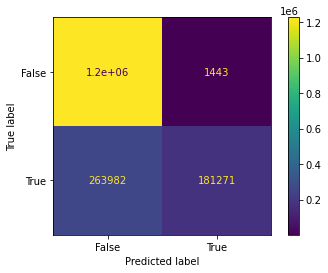

In [9]:
# Confusion Matrix Display
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
predictions = model.predict(X_test_scaled)
cm = confusion_matrix(y_test, predictions, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()

plt.show()

In [10]:
# Classification Report
from sklearn.metrics import classification_report
y_true = y_test
y_pred = predictions
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

       False       0.82      1.00      0.90   1227727
        True       0.99      0.41      0.58    445253

    accuracy                           0.84   1672980
   macro avg       0.91      0.70      0.74   1672980
weighted avg       0.87      0.84      0.82   1672980



In [11]:
import pickle
pickle.dump(model,open('../Model- sav/RFC_Modified.sav','wb'))

In [12]:
with open('../Model- sav/RFC_Modified.sav','rb') as f:
    model = pickle.load(f)

In [13]:
model

RandomForestClassifier(max_depth=6, min_samples_leaf=10000, random_state=42)